<a href="https://colab.research.google.com/github/rijalahmad77/Praktikum_G.231.21.0042/blob/main/UTS2_G_231_21_0042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [25]:
data=pd.read_csv('CarPrice_Assignment.csv')

load dataset

In [26]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


menampilkan 10 frame pertama

In [27]:
data=data.drop(['car_ID'],axis=1)

menghapus kolom car_id

In [28]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

mengganti beberapa kesalahan penulisan atau variasi nama merek mobil dalam kolom 'CarName' menjadi  benar

In [29]:
data['symboling']=data['symboling'].astype('str')

menjadikan kolom 'symboling' sekarang memiliki tipe data string

In [30]:
categorical_cols=data.select_dtypes(include=['object']).columns

variabel categorical_cols akan berisi daftar nama kolom-kolom dalam DataFrame 'data' yang memiliki tipe data objek

In [42]:
data[categorical_cols].head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,2,audi fox,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,1,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


menampilkan 10 baris pertama dari kolom kategori dalam DataFrame

In [43]:
numerical_cols=data.select_dtypes(exclude=['object']).columns
data[numerical_cols].head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


menampilkan 10 baris pertama dari kolom numerik dalam DataFrame

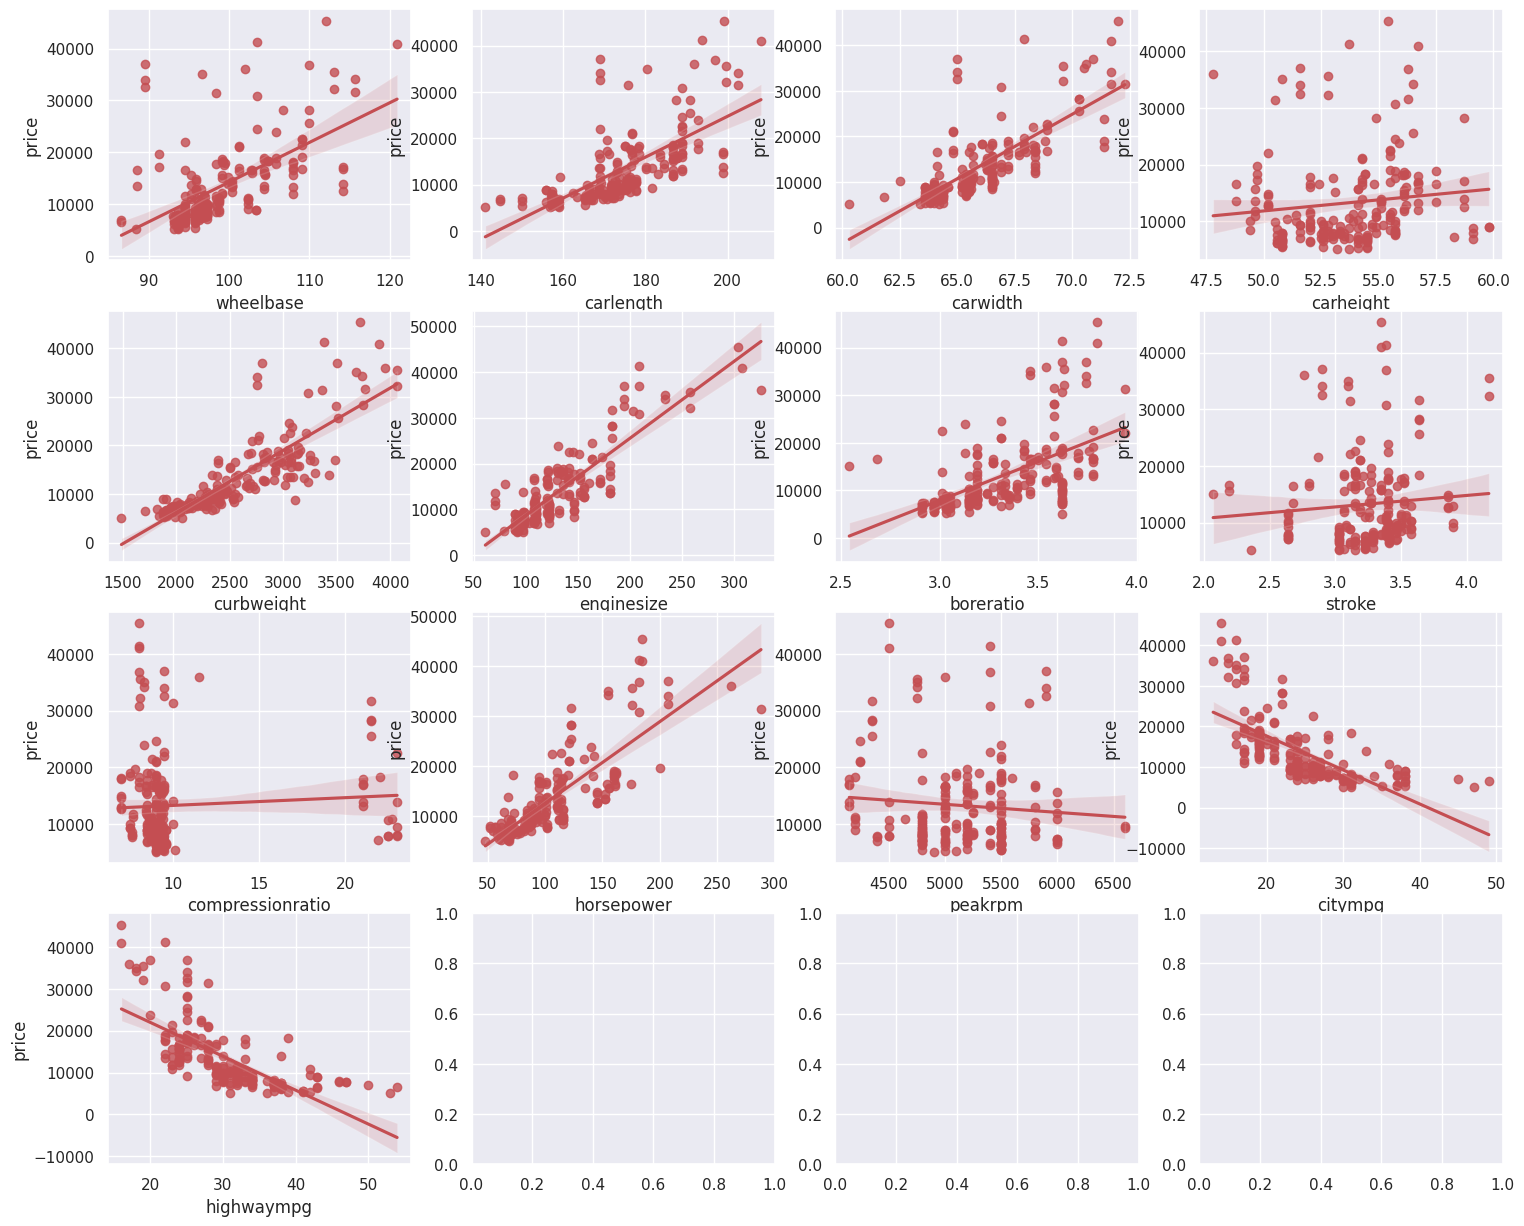

In [33]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):

    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=data,ax=axes[x][y],color='r')

membuat matriks subplot 4x4 dan mengisi setiap subplot dengan scatter plot antara kolom numerik dan kolom target 'price' untuk memberikan visualisasi hubungan antara variabel-variabel tersebut.

In [34]:
X=data[numerical_cols].drop('price',axis=1)
y=data['price']

'X' akan berisi fitur-fitur yang akan digunakan untuk melakukan prediksi atau analisis, sedangkan 'y' akan berisi nilai target yang ingin diprediksi atau dianalisis.

In [35]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


mendiskripsikan data

In [36]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=data['price']

'X' akan berisi variabel prediktor yang telah diubah menjadi representasi numerik menggunakan LabelEncoder, dan 'y' akan berisi variabel target 'price'.

In [37]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


clf_rf_3 = RandomForestRegressor(): Membuat objek RandomForestRegressoryang akan digunakan sebagai estimator untuk RFE. RandomForestRegressoradalah model regresi menggunakan ensembel dari pohon keputusan.

rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1): Membuat objek RFE dengan menggunakan clf_rf_3sebagai estimator, memilih 15 fitur terbaik, dan melakukan eliminasi satu fitur pada setiap langkahnya (langkah=1).

rfe = rfe.fit(X, y): Melatih model RFE menggunakan variabel prediktor 'X' dan variabel target 'y'. Ini akan menghasilkan pemilihan fitur berdasarkan proses eliminasi berulang.

print('Chosen best 15 feature by rfe:', X.columns[rfe.support_]): Mencetak fitur-fitur terbaik yang dipilih oleh RFE. rfe.support_adalah atribut yang berisi mask (maskara) dari fitur-fitur terbaik, dan X.columns[rfe.support_]digunakan untuk mendapatkan nama kolom dari fitur-fitur tersebut.




In [38]:
features=list(X.columns[rfe.support_])

membuat daftar fitur-fitur yang terpilih oleh RFE (Recursive Feature Elimination) menggunakan model `RandomForestRegressor`

In [39]:
x = X[features]
y = data.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

Split data menjadi training dan testing

In [40]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8839965378654326

melakukan prediksi pada data latih dan data uji, dan kemudian menghitung skor kinerja model pada data uji.

In [41]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.7375029659751728

melakukan prediksi pada data latih dan data uji, dan kemudian menghitung skor kinerja model pada data uji.